# vivarium-ecoli

Wiring diagraph of the [Covert lab's Whole-Cell E. coli model](https://github.com/CovertLab/vivarium-ecoli)

In [57]:
from bigraph_viz import plot_bigraph
from bigraph_viz.dict_utils import replace_regex_recursive

plot_settings = {
    # 'out_dir': 'out',
    # 'dpi': '500', 
}

In [58]:
ecoli = { 
    'chromosome-structure': { 
        'wires': {
            # 'listeners': ('listeners',),
            'fragmentBases': ('bulk',),
            'molecules': ('bulk',),
            'active_tfs': ('bulk',),
            'subunits': ('bulk',),
            'amino_acids': ('bulk',),
            'active_replisomes': ('unique', 'active_replisome'),
            'oriCs': ('unique', 'oriC'),
            'chromosome_domains': ('unique', 'chromosome_domain'),
            'active_RNAPs': ('unique', 'active_RNAP'),
            'RNAs': ('unique', 'RNA'),
            'active_ribosome': ('unique', 'active_ribosome'),
            'full_chromosomes': ('unique', 'full_chromosome'),
            'promoters': ('unique', 'promoter'),
            'DnaA_boxes': ('unique', 'DnaA_box')
        }
    },
    'metabolism': { 
        'wires': {
            'metabolites': ('bulk',),
            'catalysts': ('bulk',),
            'kinetics_enzymes': ('bulk',),
            'kinetics_substrates': ('bulk',),
            'amino_acids': ('bulk',),
            # 'listeners': ('listeners',),
            'environment': ('environment',),
            # 'polypeptide_elongation': ('process_state', 'polypeptide_elongation'),
            'amino_acids_total': ('bulk',)
        }
    },
    'tf-binding': { 
        'wires': {
            'promoters': ('unique', 'promoter'),
            'active_tfs': ('bulk',),
            'active_tfs_total': ('bulk',),
            'inactive_tfs_total': ('bulk',),
            # 'listeners': ('listeners',)
        }
    },
    'transcript-initiation': { 
        'wires': {
            'environment': ('environment',),
            'full_chromosomes': ('unique', 'full_chromosome'),
            'RNAs': ('unique', 'RNA'),
            'active_RNAPs': ('unique', 'active_RNAP'),
            'promoters': ('unique', 'promoter'),
            'molecules': ('bulk',),
            # 'listeners': ('listeners',)
        }
    },
    'transcript-elongation': { 
        'wires': {
            'environment': ('environment',),
            'RNAs': ('unique', 'RNA'),
            'active_RNAPs': ('unique', 'active_RNAP'),
            'molecules': ('bulk',),
            'bulk_RNAs': ('bulk',),
            'ntps': ('bulk',),
            # 'listeners': ('listeners',)
        }
    },
    'rna-degradation': { 
        'wires': {
            'charged_trna': ('bulk',),
            'bulk_RNAs': ('bulk',),
            'nmps': ('bulk',),
            'fragmentMetabolites': ('bulk',),
            'fragmentBases': ('bulk',),
            'endoRnases': ('bulk',),
            'exoRnases': ('bulk',),
            'subunits': ('bulk',),
            'molecules': ('bulk',),
            'RNAs': ('unique', 'RNA'),
            'active_ribosome': ('unique', 'active_ribosome'),
            # 'listeners': ('listeners',)
        }
    },
    'polypeptide-initiation': { 
        'wires': {
            'environment': ('environment',),
            # 'listeners': ('listeners',),
            'active_ribosome': ('unique', 'active_ribosome'),
            'RNA': ('unique', 'RNA'),
            'subunits': ('bulk',)
        }
    },
    'polypeptide-elongation': { 
        'wires': {
            'environment': ('environment',),
            # 'listeners': ('listeners',),
            'active_ribosome': ('unique', 'active_ribosome'),
            'molecules': ('bulk',),
            'monomers': ('bulk',),
            'amino_acids': ('bulk',),
            'ppgpp_reaction_metabolites': ('bulk',),
            'uncharged_trna': ('bulk',),
            'charged_trna': ('bulk',),
            'charging_molecules': ('bulk',),
            'synthetases': ('bulk',),
            'subunits': ('bulk',),
            # 'polypeptide_elongation': ('process_state', 'polypeptide_elongation'),
            'molecules_total': ('bulk',),
            'amino_acids_total': ('bulk',),
            'charged_trna_total': ('bulk',),
            'uncharged_trna_total': ('bulk',)
        }
    },
    'complexation': {
        'wires': {
            'molecules': ('bulk',), 
            # 'listeners': ('listeners',)
        }
    },
    'two-component-system': { 
        'wires': {
            # 'listeners': ('listeners',),
            'molecules': ('bulk',)
        }
    },
    'equilibrium': {
        'wires': {
            # 'listeners': ('listeners',), 
            'molecules': ('bulk',)
        }
    },
    'protein-degradation': { 
        'wires': {
            'metabolites': ('bulk',),
            'proteins': ('bulk',)
        }
    },
    'chromosome-replication': { 
        'wires': {
            'replisome_trimers': ('bulk',),
            'replisome_monomers': ('bulk',),
            'dntps': ('bulk',),
            'ppi': ('bulk',),
            'active_replisomes': ('unique', 'active_replisome'),
            'oriCs': ('unique', 'oriC'),
            'chromosome_domains': ('unique', 'chromosome_domain'),
            'full_chromosomes': ('unique', 'full_chromosome'),
            # 'listeners': ('listeners',),
            'environment': ('environment',)
        }
    },
    'unique': {
        'chromosome_domain': {},
        'full_chromosome': {},
        'oriC': {},
        'active_replisome': {},
        'RNA': {},
        'active_ribosome': {},
        'DnaA_box': {},
        'promoter': {},
    },
    'bulk': {},
    'environment': {},
    # 'listeners': {},
    # 'ecoli-mass-listener': { 
    #     'bulk': ('bulk',),
    #     'unique': ('unique',),
    #     'listeners': ('listeners',)
    # },
    # 'mRNA_counts_listener': { 
    #     'listeners': ('listeners',),
    #     'RNAs': ('unique', 'RNA')
    # }
}
node_groups = [[
        ('unique',), ('bulk',), ('environment',), 
    ],
]
fig = plot_bigraph(ecoli, **plot_settings, remove_process_place_edges=True, rankdir='RL', node_groups=node_groups, filename='ecoli')

[See E. coli wiring diagram](https://github.com/vivarium-collective/bigraph-viz/blob/main/doc/_static/ecoli.png?raw=true)

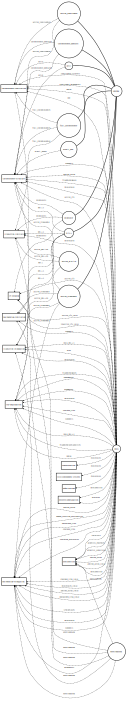

In [59]:
fig

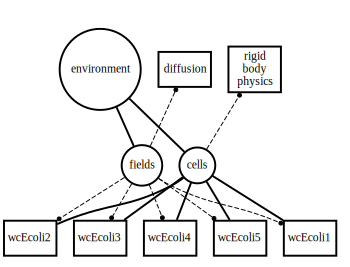

In [60]:
ecoli_schema = {
    'wires': {
        'uptake': ['..', 'fields'],
    }
}
n_ecoli = 6

ecoli_env = {
    'environment': {
        'cells': {
            f'wcEcoli{n}': ecoli_schema for n in range(1, n_ecoli)
        },
        'fields': {},
        'diffusion': {
            'wires': {'': 'fields'}
        },
        'rigid body physics': {
            'wires': {'': 'cells'}
        }
    }
}

plot_settings3 = {
    **plot_settings,
    'rankdir': 'TB',
    'port_labels': False,
    'node_groups': [
        [('environment',), ('environment', 'diffusion',), ('environment', 'rigid<br/>body<br/>physics',),]
    ],
    'invisible_edges': [
        (('environment',), ('environment', 'diffusion')),
        (('environment',), ('environment', 'rigid<br/>body<br/>physics')),
    ]
}
ecoli_env = replace_regex_recursive(ecoli_env)
plot_bigraph(ecoli_env, **plot_settings3, filename='ecoli_colony')

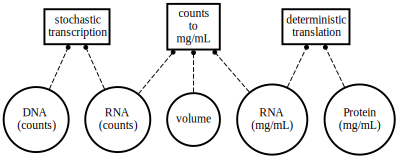

In [66]:
comp = {
    'stochastic transcription': {
        'wires': {
            'DNA': 'DNA (counts)',
            'RNA': 'RNA (counts)',
        }
    },
    'counts to mg/mL': {
        'wires': {
            'RNA_counts': 'RNA (counts)',
            'RNA_concs': 'RNA (mg/mL)',
            'volume': 'volume',
        }
    },
    'deterministic translation': {
        'wires': {
            'RNA': 'RNA (mg/mL)',
            'Protein': 'Protein (mg/mL)',
        }
    },
    'DNA (counts)': {},
    'RNA (counts)': {},
    'RNA (mg/mL)': {},
    'Protein (mg/mL)': {},
    'volume': {},
}

plot_settings3 = {
    **plot_settings,
    'remove_process_place_edges': True,
    'rankdir': 'BT',
    'port_labels': False,
}
comp = replace_regex_recursive(comp)
plot_bigraph(comp, **plot_settings3, filename='comp')


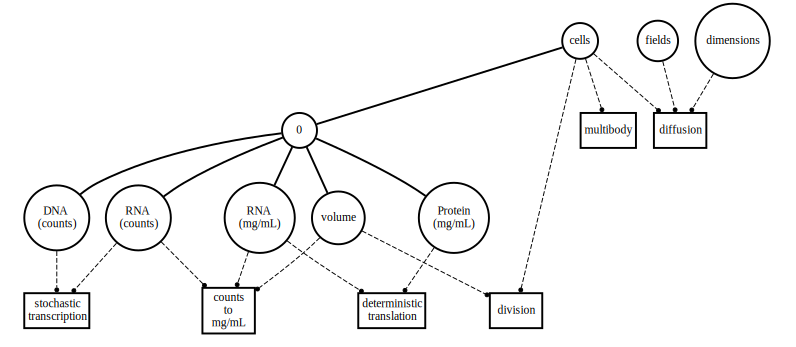

In [64]:
comp_div = {
    'division': {
        'wires': {
            'volume': 'volume',
            'divide': ['..', '..', 'cells'],
        }
    },
    **comp
}

env = {
    'fields': {},
    'dimensions': {},
    'multibody': {
        'wires': {
            'cells': 'cells'
        }
    },
    'diffusion': {
        'wires': {
            'cells': 'cells',
            'fields': 'fields',
            'dimensions': 'dimensions'
        }
    }
}

comp_nested = {
    'cells': {
        '0': comp_div
    },
    **env
}
plot_settings3 = {
    **plot_settings,
    'remove_process_place_edges': True,
    'port_labels': False,
}
plot_bigraph(comp_nested, **plot_settings3, filename='comp_nested1')

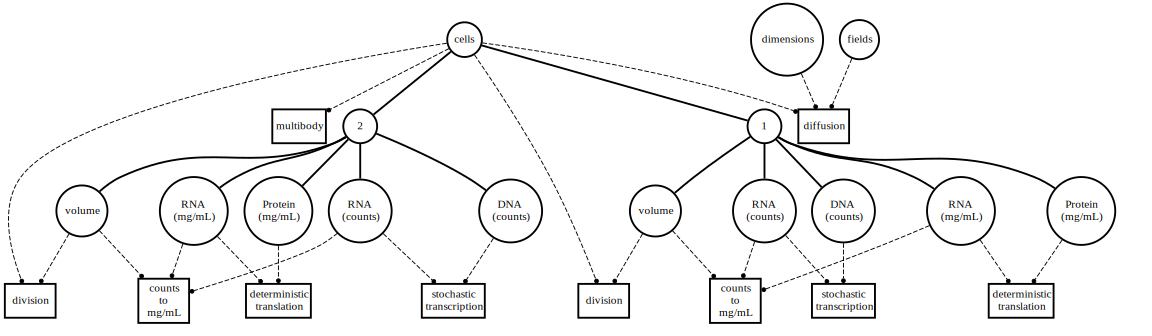

In [63]:
comp_nested = {
    'cells': {
        '1': comp_div,
        '2': comp_div,
    },
    **env
}
plot_bigraph(comp_nested, **plot_settings3, filename='comp_nested2')